In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip list

Package                           Version
--------------------------------- ------------------
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.3
anaconda-project                  0.11.1
annotated-types                   0.6.0
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.3
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           6.1.3
astropy-iers-data

Intercepto (theta0): 1.38 
	Este valor representa o ponto onde a reta cruza o eixo y.

Inclinação (theta1): 8.13 
	A inclinação da reta indica a taxa de variação da produção de frutas
	em relação às horas de sol.

Custo final: 8.56 
	Este é o valor da função de custo final, que mede o erro médio 
	entre as previsões e os valores reais.

	Ou seja, para 6.5 horas de sol, a produção estimada é 54.23 kg
	Isso mostra como a nossa equação de regressão prevê a produção de frutas
	com base nas horas de sol.


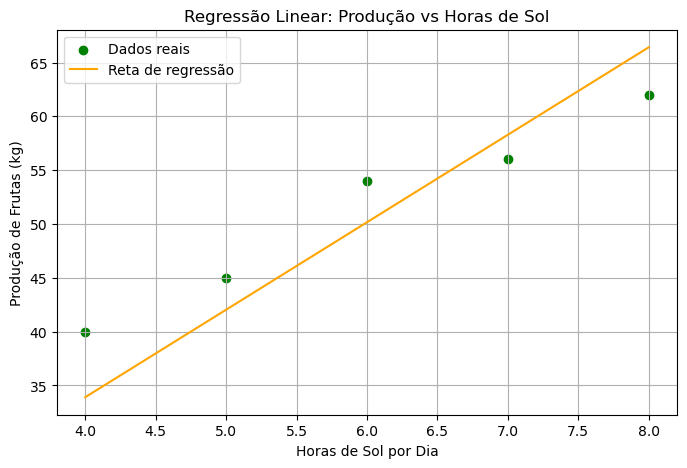

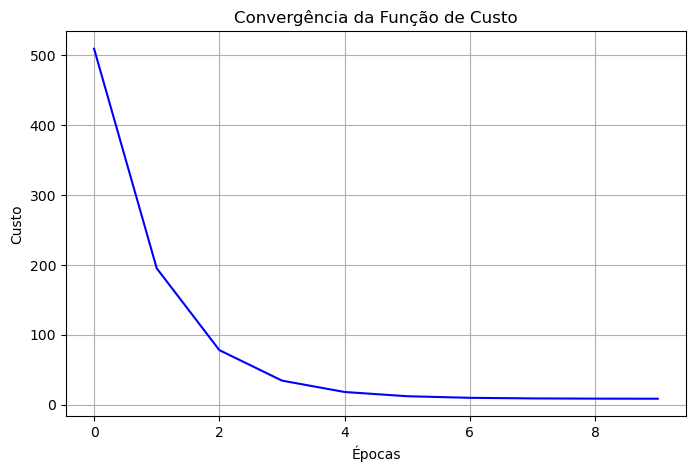

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Funções auxiliares
# -------------------------------

def prever(x, intercepto, inclinacao):
    """Calcula a predição baseada na equação da reta."""
    return intercepto + inclinacao * x

def custo(intercepto, inclinacao, X, Y):
    """Calcula o erro quadrático médio (função de custo)."""
    y_previsto = prever(X, intercepto, inclinacao)
    return np.mean((y_previsto - Y) ** 2) / 2

def plotar_regressao(X, Y, intercepto, inclinacao):
    """Plota os dados e a reta de regressão."""
    plt.figure(figsize=(8, 5))
    plt.scatter(X, Y, color='green', label='Dados reais')
    plt.plot(X, prever(X, intercepto, inclinacao), color='orange', label='Reta de regressão')
    plt.xlabel('Horas de Sol por Dia')
    plt.ylabel('Produção de Frutas (kg)')
    plt.title('Regressão Linear: Produção vs Horas de Sol')
    plt.legend()
    plt.grid(True)
    plt.show()

def plotar_custo(historia_custo):
    """Plota a evolução da função de custo."""
    plt.figure(figsize=(8, 5))
    plt.plot(historia_custo, color='blue')
    plt.xlabel('Épocas')
    plt.ylabel('Custo')
    plt.title('Convergência da Função de Custo')
    plt.grid(True)
    plt.show()

# -------------------------------
# Dados de entrada
# -------------------------------

# Exemplo de dados: Horas de sol (X) e Produção de frutas (Y)
X = np.array([4, 5, 6, 7, 8], dtype=float)
Y = np.array([40, 45, 54, 56, 62], dtype=float)

# Hiperparâmetros
taxa_aprendizado = 0.01   # taxa de aprendizado
epocas = 10  # número de iterações

# Inicialização dos parâmetros
intercepto = 0.0
inclinacao = 0.0
historia_custo = []

# -------------------------------
# Gradiente Descendente
# -------------------------------

for _ in range(epocas):
    y_previsto = prever(X, intercepto, inclinacao)
    erro = y_previsto - Y
    grad0 = np.mean(erro)
    grad1 = np.mean(erro * X)
    intercepto -= taxa_aprendizado * grad0
    inclinacao -= taxa_aprendizado * grad1
    historia_custo.append(custo(intercepto, inclinacao, X, Y))

# -------------------------------
# Resultados
# -------------------------------

print(f"Intercepto (theta0): {intercepto:.2f} \n\tEste valor representa o ponto onde a reta cruza o eixo y.")
print(f"\nInclinação (theta1): {inclinacao:.2f} \n\tA inclinação da reta indica a taxa de variação da produção de frutas\n\tem relação às horas de sol.")
print(f"\nCusto final: {historia_custo[-1]:.2f} \n\tEste é o valor da função de custo final, que mede o erro médio \n\tentre as previsões e os valores reais.")

# Previsão para 6.5 horas de sol
x_teste = 6.5
y_previsto = prever(x_teste, intercepto, inclinacao)
print(f"\n\tOu seja, para {x_teste} horas de sol, a produção estimada é {y_previsto:.2f} kg\n\tIsso mostra como a nossa equação de regressão prevê a produção de frutas\n\tcom base nas horas de sol.")

# -------------------------------
# Visualizações
# -------------------------------

plotar_regressao(X, Y, intercepto, inclinacao)
plotar_custo(historia_custo)
     

In [14]:
import numpy as np
import time

# Criando um vetor com 10 milhões de elementos
a = np.random.rand(10_000_000)
b = np.random.rand(10_000_000)

# Forma com for
start = time.time()
resultado = np.zeros_like(a)
for i in range(len(a)):
    resultado[i] = a[i] + b[i]
print("Tempo com for:", time.time() - start)

# Forma vetorizada
start = time.time()
resultado = a + b
print("Tempo vetorizado:", time.time() - start)

Tempo com for: 2.439100980758667
Tempo vetorizado: 0.02078557014465332
